# Project Python Foundations: FoodHub Data Analysis by Meng Zhang

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project 1/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Write your code here
df.shape

(1898, 9)

#### Observations:

There are 1898 rows and 9 columns in the data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

There are four columns of data in the integer type, which are order_id, customer_id, food_preparation_time, and delivery_time. One column of data is float type, which is the cost_of_the_order. The rest four columns of data have the object type, which are restaurant_name, cuisine_type, day_of_the_week, and rating.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

No. There are no missing values in the dataset.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:

The minimum, average, and maximum time it takes for food to be prepared once an order is placed are 20 minutes, 27 minutes, and 35 minutes, respectively.

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# Write the code here
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [9]:
df['rating'].value_counts(normalize=True)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

#### Observations:

There are 736 orders not rated, which consists of approximately 38.8% of the orders.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Observation on order ID

In [10]:
# Write the code here
# Check the unique number of order ID
df['order_id'].nunique()

1898

- There are 1898 unique orders in the dataset.

### Obervation on customer ID

In [11]:
# Check the unique number of customer ID
df['customer_id'].nunique()

1200

- There are 1200 unique customers in the dataset.

### Observation on restaurant name

In [12]:
# Check the unique number of restaurant numer
df['restaurant_name'].nunique()

178

- There are 178 unique restaurants in the dataset.

### Observation on cuisine type

In [13]:
# Check the unique number of cuisine type
df['cuisine_type'].nunique()

14

- There are 14 cuisine types in the dataset.

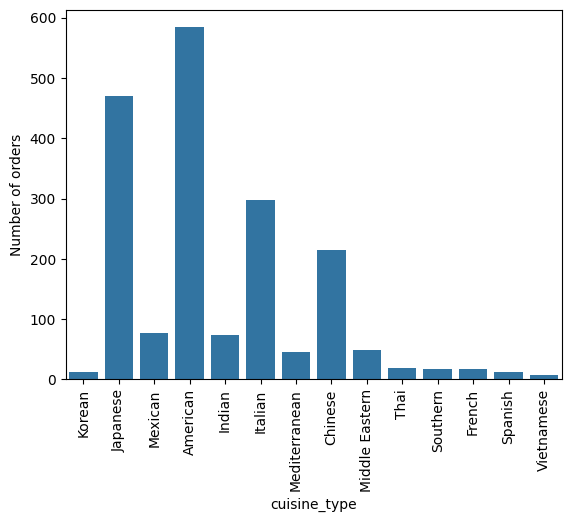

In [14]:
# Check the distribution of order numbers in different cuisine types
sns.countplot(data=df, x='cuisine_type')
plt.ylabel('Number of orders')
plt.xticks(rotation=90);

- Among all the cuisine types, American food has the most orders, followed by the Japanese food, Italian food, and Chinese food in terms of the order numbers.

### Observation on cost of the order

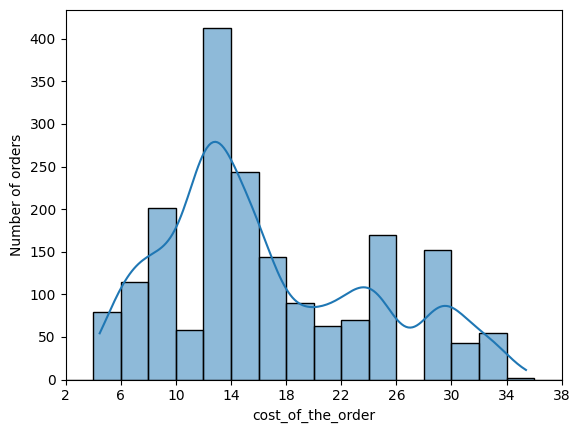

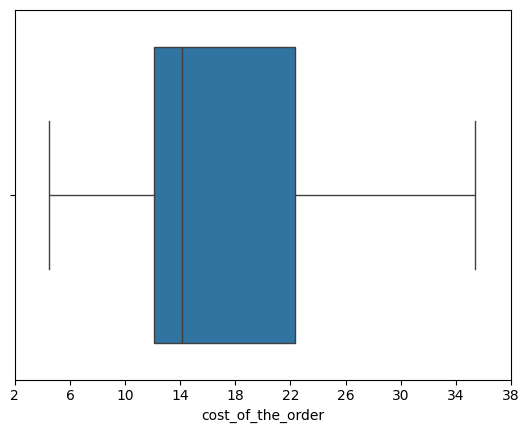

In [15]:
# Check the distribution of order costs
sns.histplot(data=df, x='cost_of_the_order',kde=True,bins=np.arange(2,40,2))
plt.ylabel('Number of orders')
plt.xticks(np.arange(2,40,4))
plt.xlim([2,38])
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.xticks(np.arange(2,40,4))
plt.xlim([2,38])
plt.show();

- The distribution of the cost of orders is right-skewed.
- The cost of orders occurs the most around 13 dollars.
- The majority (i.e., from 25% to 75% percentile) of the orders costs between 12 dollars and 22 dollars. The median cost of the orders is around 14 dollars.

### Observation on the day of the week

In [16]:
# Check the unique number of day of the week
df['day_of_the_week'].nunique()

2

In [17]:
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

- There are two unique values (i.e., weekend and weekday) in the day of the week.

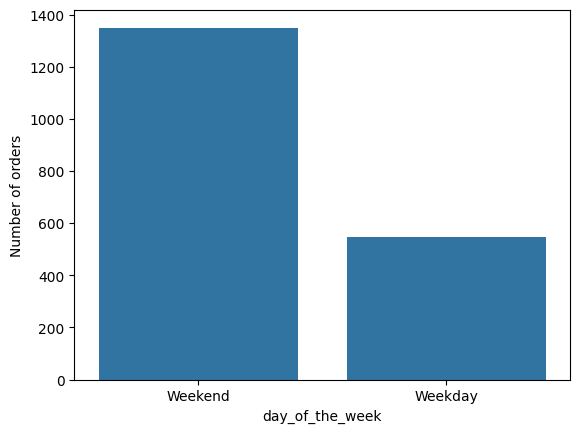

In [18]:
# Check the distribution of order numbers in different day of the week.
sns.countplot(data=df, x='day_of_the_week')
plt.ylabel('Number of orders');

- There are more orders in the weekends than in the weekdays.

### Observations on the rating

In [19]:
# Check the unique number of ratings
df['rating'].nunique()

4

- There are 4 unique categories in the order rating.

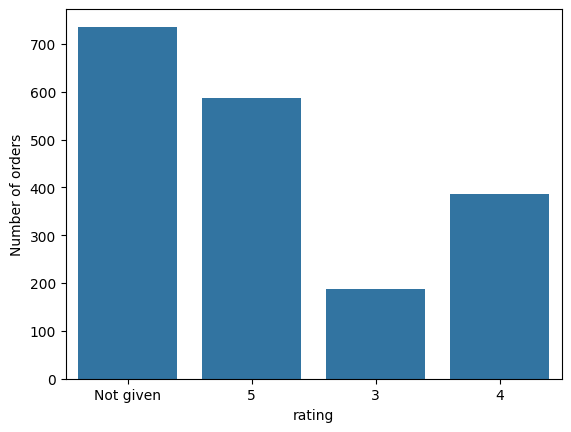

In [20]:
# Check the distribution of order numbers in different rating categories.
sns.countplot(data=df, x='rating')
plt.ylabel('Number of orders')
plt.show();

- More than 700 orders are not rated.
- For the orders that were rated, nearly 600 orders were rated as 5, nearly 400 orders were rated as 4, and around 200 orders were rated as 3.

### Observation of the food preparation time

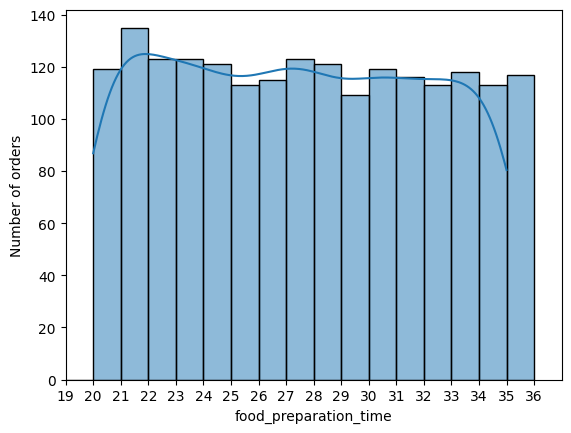

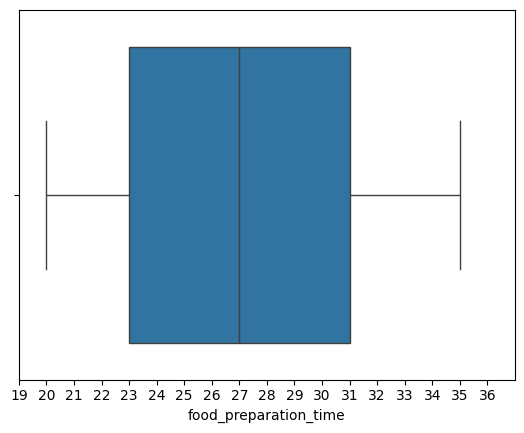

In [21]:
# Check the distribution of food preparation time.
sns.histplot(data=df, x='food_preparation_time', kde=True, bins=np.arange(19,37,1))
plt.ylabel('Number of orders')
plt.xticks(np.arange(19,37,1))
plt.xlim([19,37])
plt.show()

sns.boxplot(data=df, x='food_preparation_time')
plt.xticks(np.arange(19,37,1))
plt.xlim([19,37])
plt.show();

- The food preparation time generally follows a uniform distribution from 20 minutes to 35 minutes in the dataset.
- The lower quartile, median, and higher quartile of the food preparation time are 23 minutes, 27 minutes, and 31 minutes, respectively.

### Observation of the delivery time

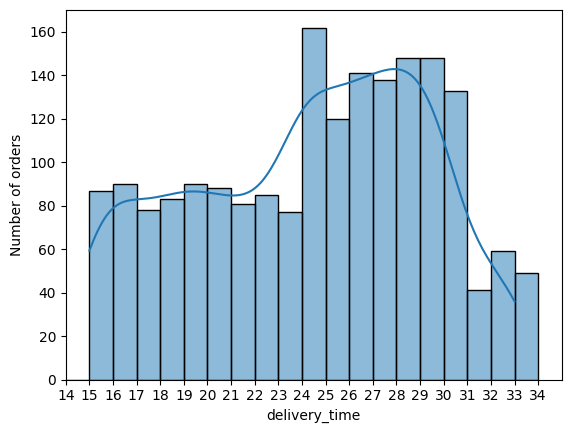

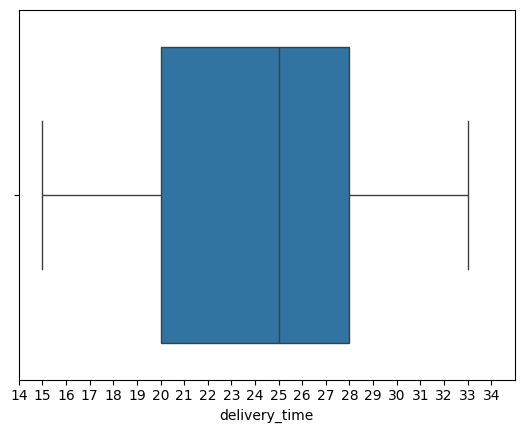

In [22]:
# Check the distribution of delivery time.
sns.histplot(data=df, x='delivery_time', kde=True, bins=np.arange(14,35,1))
plt.ylabel('Number of orders')
plt.xticks(np.arange(14,35,1))
plt.xlim([14,35])
plt.show()

sns.boxplot(data=df, x='delivery_time')
plt.xticks(np.arange(14,35,1))
plt.xlim([14,35])
plt.show();

- The delivery time ranges from 15 minutes to 33 minutes.
- The distribution of delivery time is skewed towards left.
- The lower quartile, median, and higher quartile of the delivery time are 20 minutes, 25 minutes, and 28 minutes, respectively.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [23]:
# Write the code here
df.groupby(df['restaurant_name'])['order_id'].count().sort_values(ascending=False).head(5)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

#### Observations:

The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [24]:
# Write the code here
df.loc[df['day_of_the_week']=='Weekend'].groupby(df['cuisine_type'])['order_id'].count().sort_values(ascending=False)

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: order_id, dtype: int64

#### Observations:

The most popular cuisine on weekends is American food.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [25]:
# Write the code here
percent = df.loc[df['cost_of_the_order'] > 20.]['order_id'].count()/df['order_id'].count()*100.
print("There are "+str(round(percent))+"% of the orders cost more than 20 dollars.")

There are 29% of the orders cost more than 20 dollars.


#### Observations:

29% of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [26]:
# Write the code here
mean_time = df['delivery_time'].mean()
print("The mean order delivery time is "+str(round(mean_time))+" minutes.")

The mean order delivery time is 24 minutes.


#### Observations:

The mean order delivery time is 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [27]:
# Write the code here
df.groupby(df['customer_id']).nunique()['order_id'].sort_values(ascending=False).head(3)

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64

#### Observations:

The IDs of the top 3 most frequent customers at 52832, 47440, and 83287. The numbers of orders they placed are 13, 10, and 9, respectively.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Correlations among numerical variables in the dataset

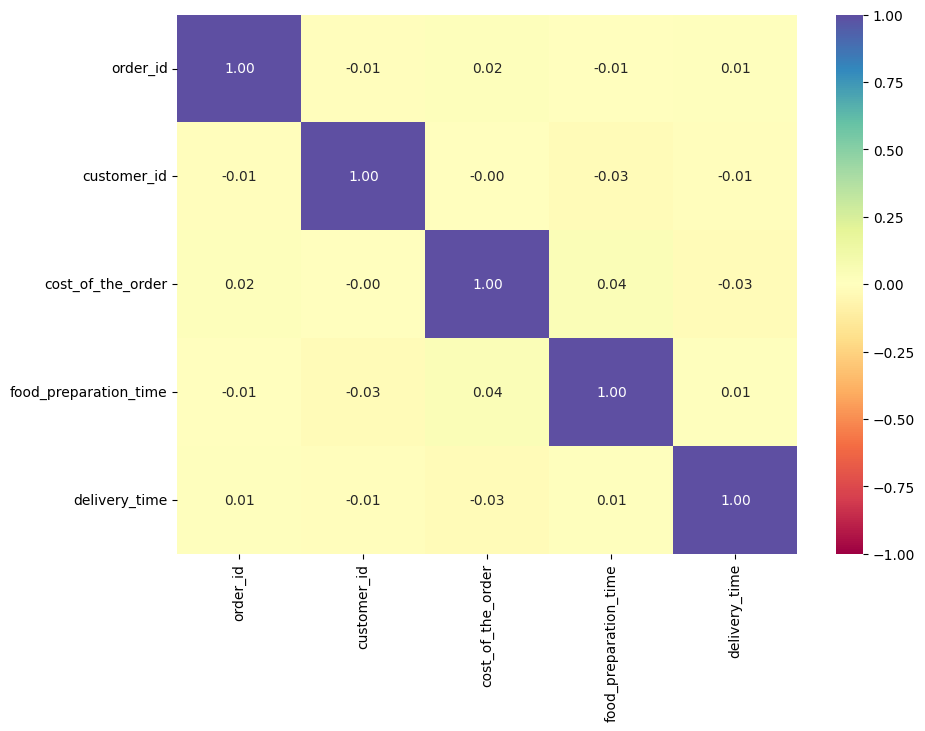

In [28]:
# Write the code here
num_var = ['order_id','customer_id','cost_of_the_order','food_preparation_time','delivery_time']

plt.figure(figsize=(10, 7))
sns.heatmap(df[num_var].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show();

- There are nearly no correlations among all variables (i.e., cost of the order, food preparation time, and delivery time)

### Observation for multivariate between numerical and categorical variables

Cost of the order and cuisine type

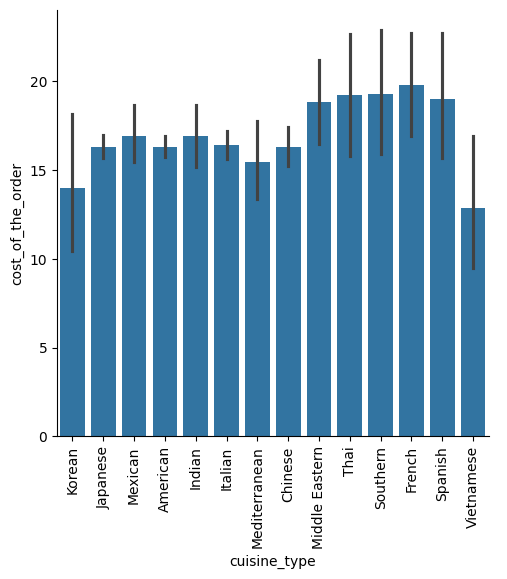

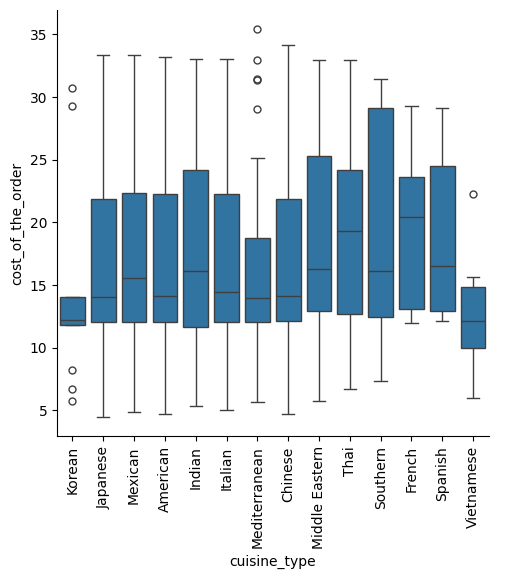

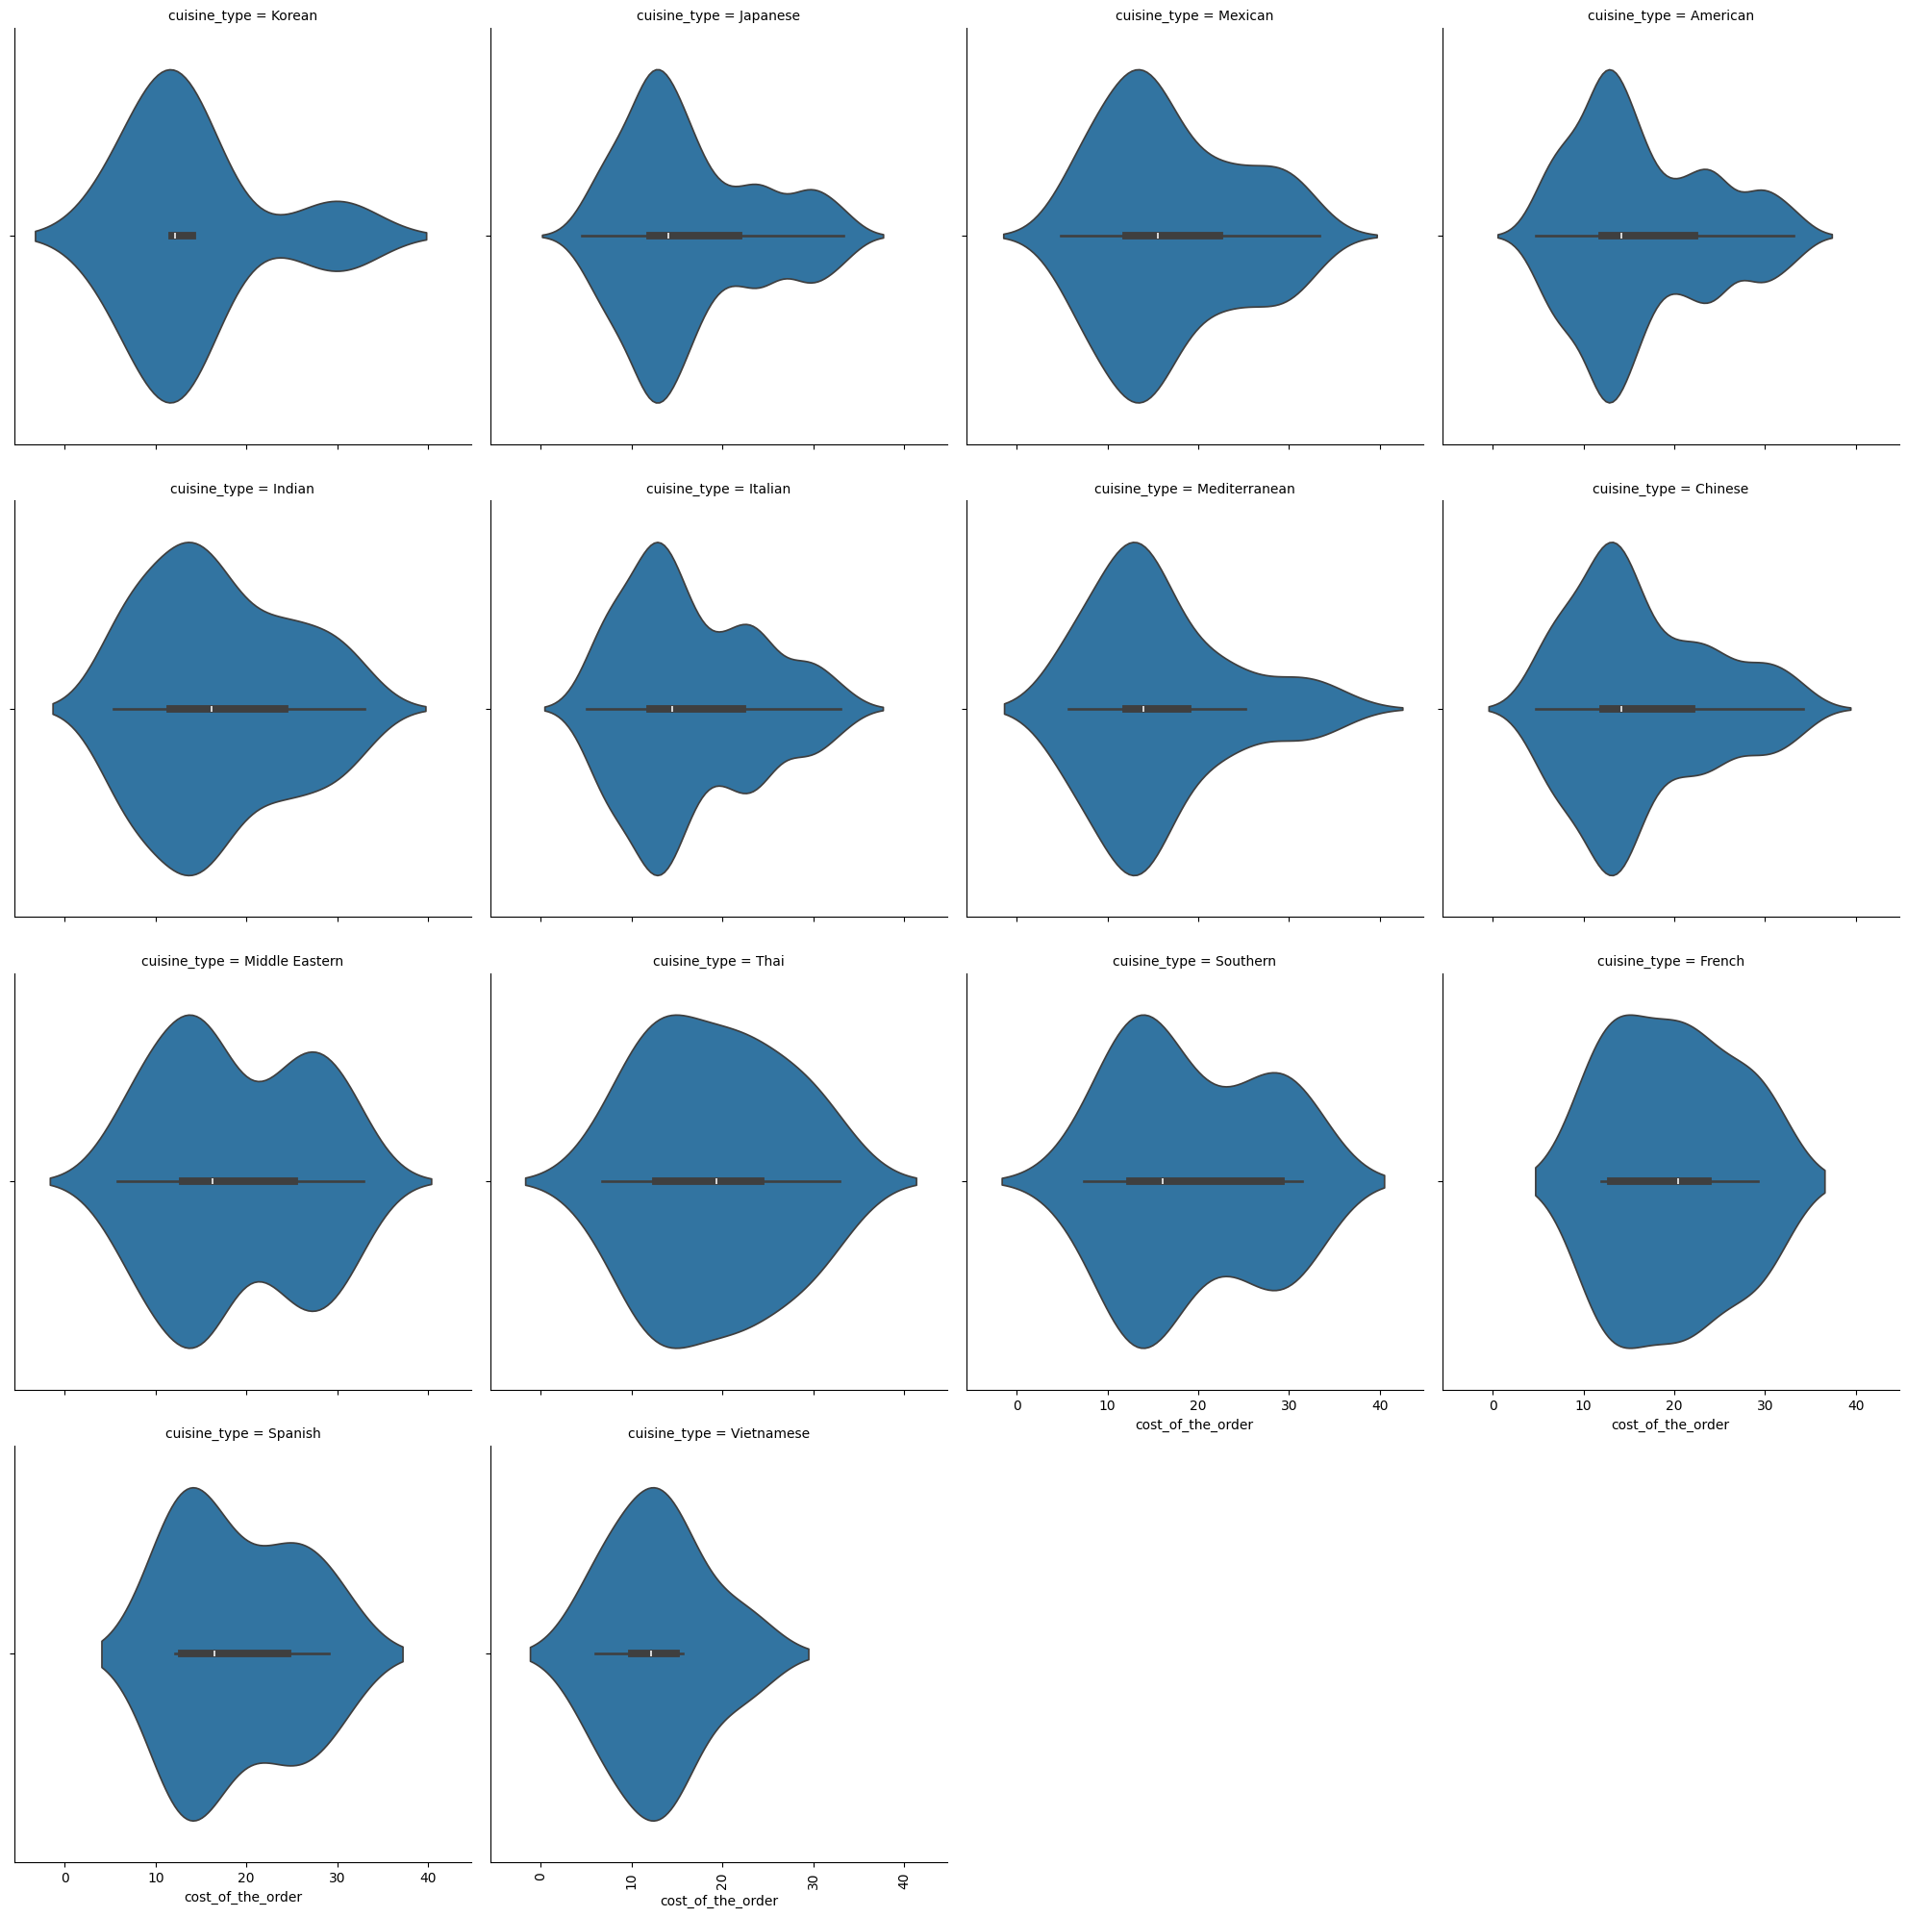

In [29]:
sns.catplot(data=df, x='cuisine_type', y='cost_of_the_order',kind='bar')
plt.xticks(rotation=90)
plt.show()

sns.catplot(data=df, x='cuisine_type', y='cost_of_the_order',kind='box')
plt.xticks(rotation=90)
plt.show()

sns.catplot(data=df, x='cost_of_the_order',col='cuisine_type',col_wrap=4,kind='violin')
plt.xticks(rotation=90)
plt.show();

- The analysis shows that among all the cuisine types, Korean and Vietnamese food usually cost less compared to other cuisine types. French food has the highest mean and median price than other cuisine types.
- The distributions of cost of the order are right-skewed for most cuisine types, except for the Middle Eastern, Thai, and French food.

Food preparation time and cuisine type

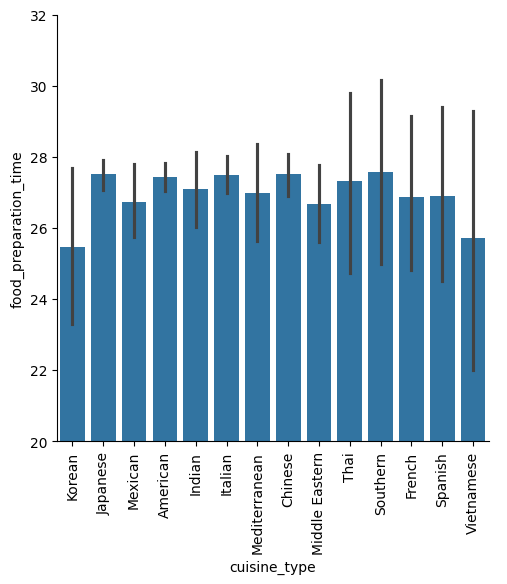

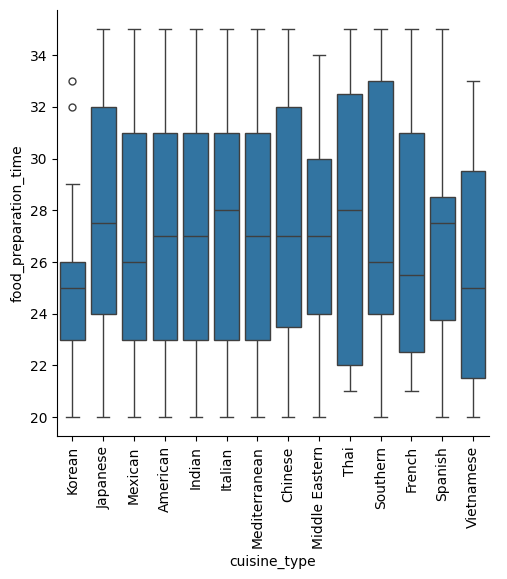

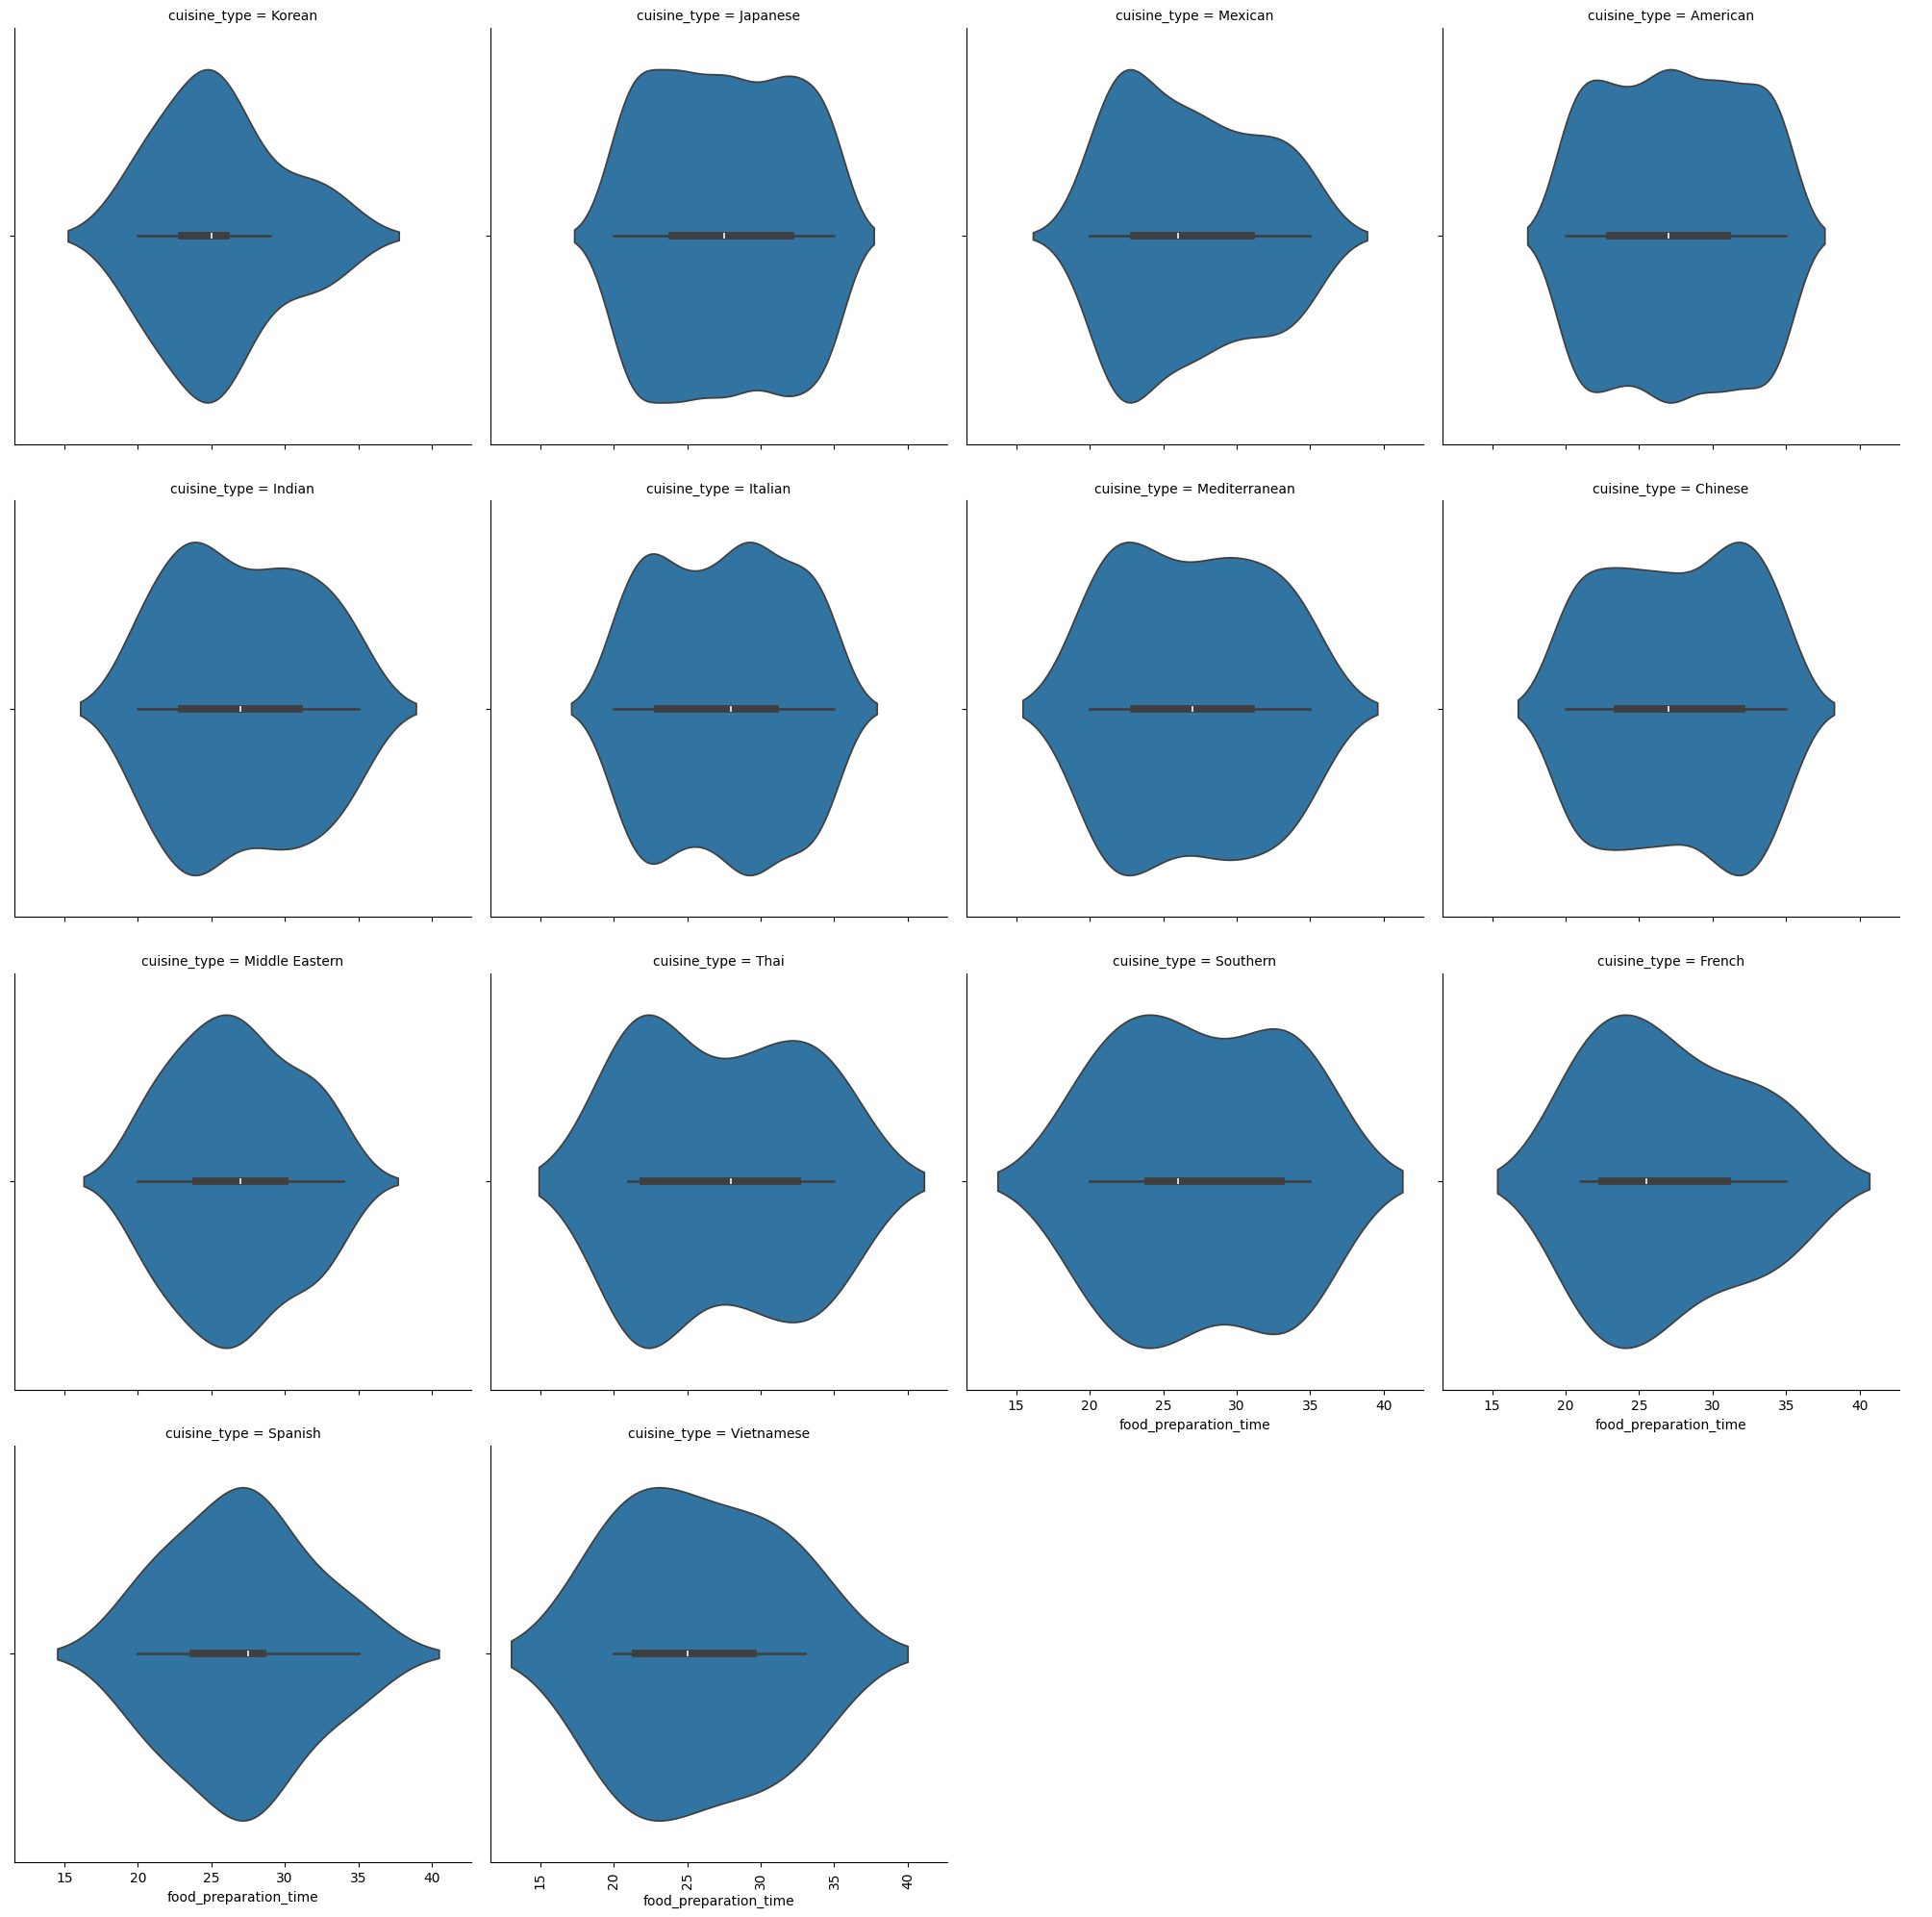

In [30]:
sns.catplot(data=df, x='cuisine_type', y='food_preparation_time',kind='bar')
plt.xticks(rotation=90)
plt.ylim(20,32)
plt.show()

sns.catplot(data=df, x='cuisine_type', y='food_preparation_time',kind='box')
plt.xticks(rotation=90)
plt.show()

sns.catplot(data=df, x='food_preparation_time',col='cuisine_type',col_wrap=4,kind='violin')
plt.xticks(rotation=90)
plt.show();

- The mean food preparation time ranges from 25 minutes to 28 minutes for all types of cuisines.
- The median food preparation time varies largely for different cuisine types. For example, the median food preparation time is comparable between Korean and Vietnamese food, which is shorter than other cuisines. The median food preparation time of Italian and Thai food is longer than others.
- The higher quartile of food preparation time is highest for Southern food.
- The distribution of food preparation time is right skewed for Korean, Mexican, Indian, French, and Vietnamese Food. The distributions of food preparation time are more similar to the normal distribution for Japanese, American, Middle Eastern food.

Food delivery time and cuisine type

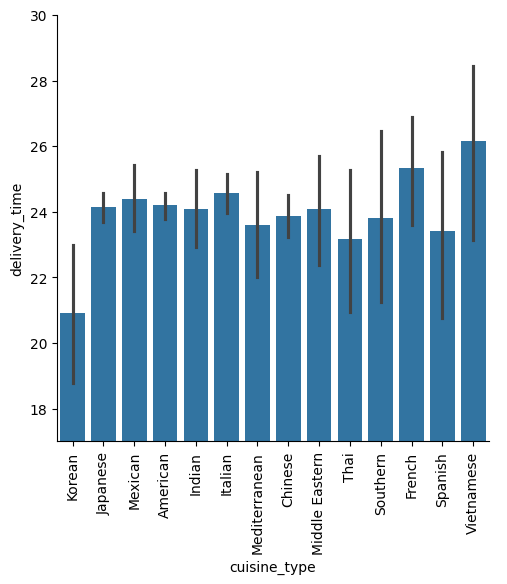

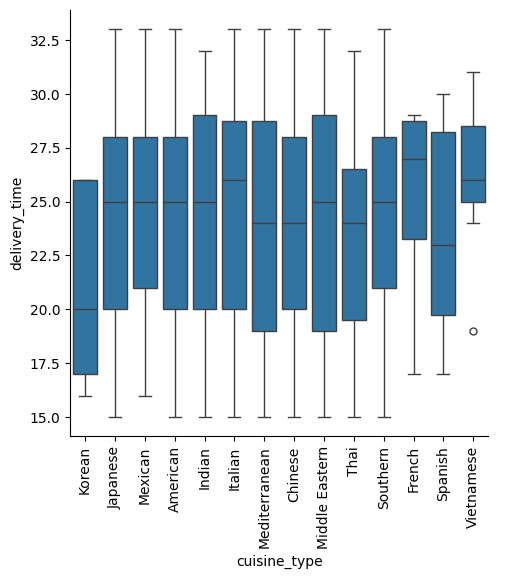

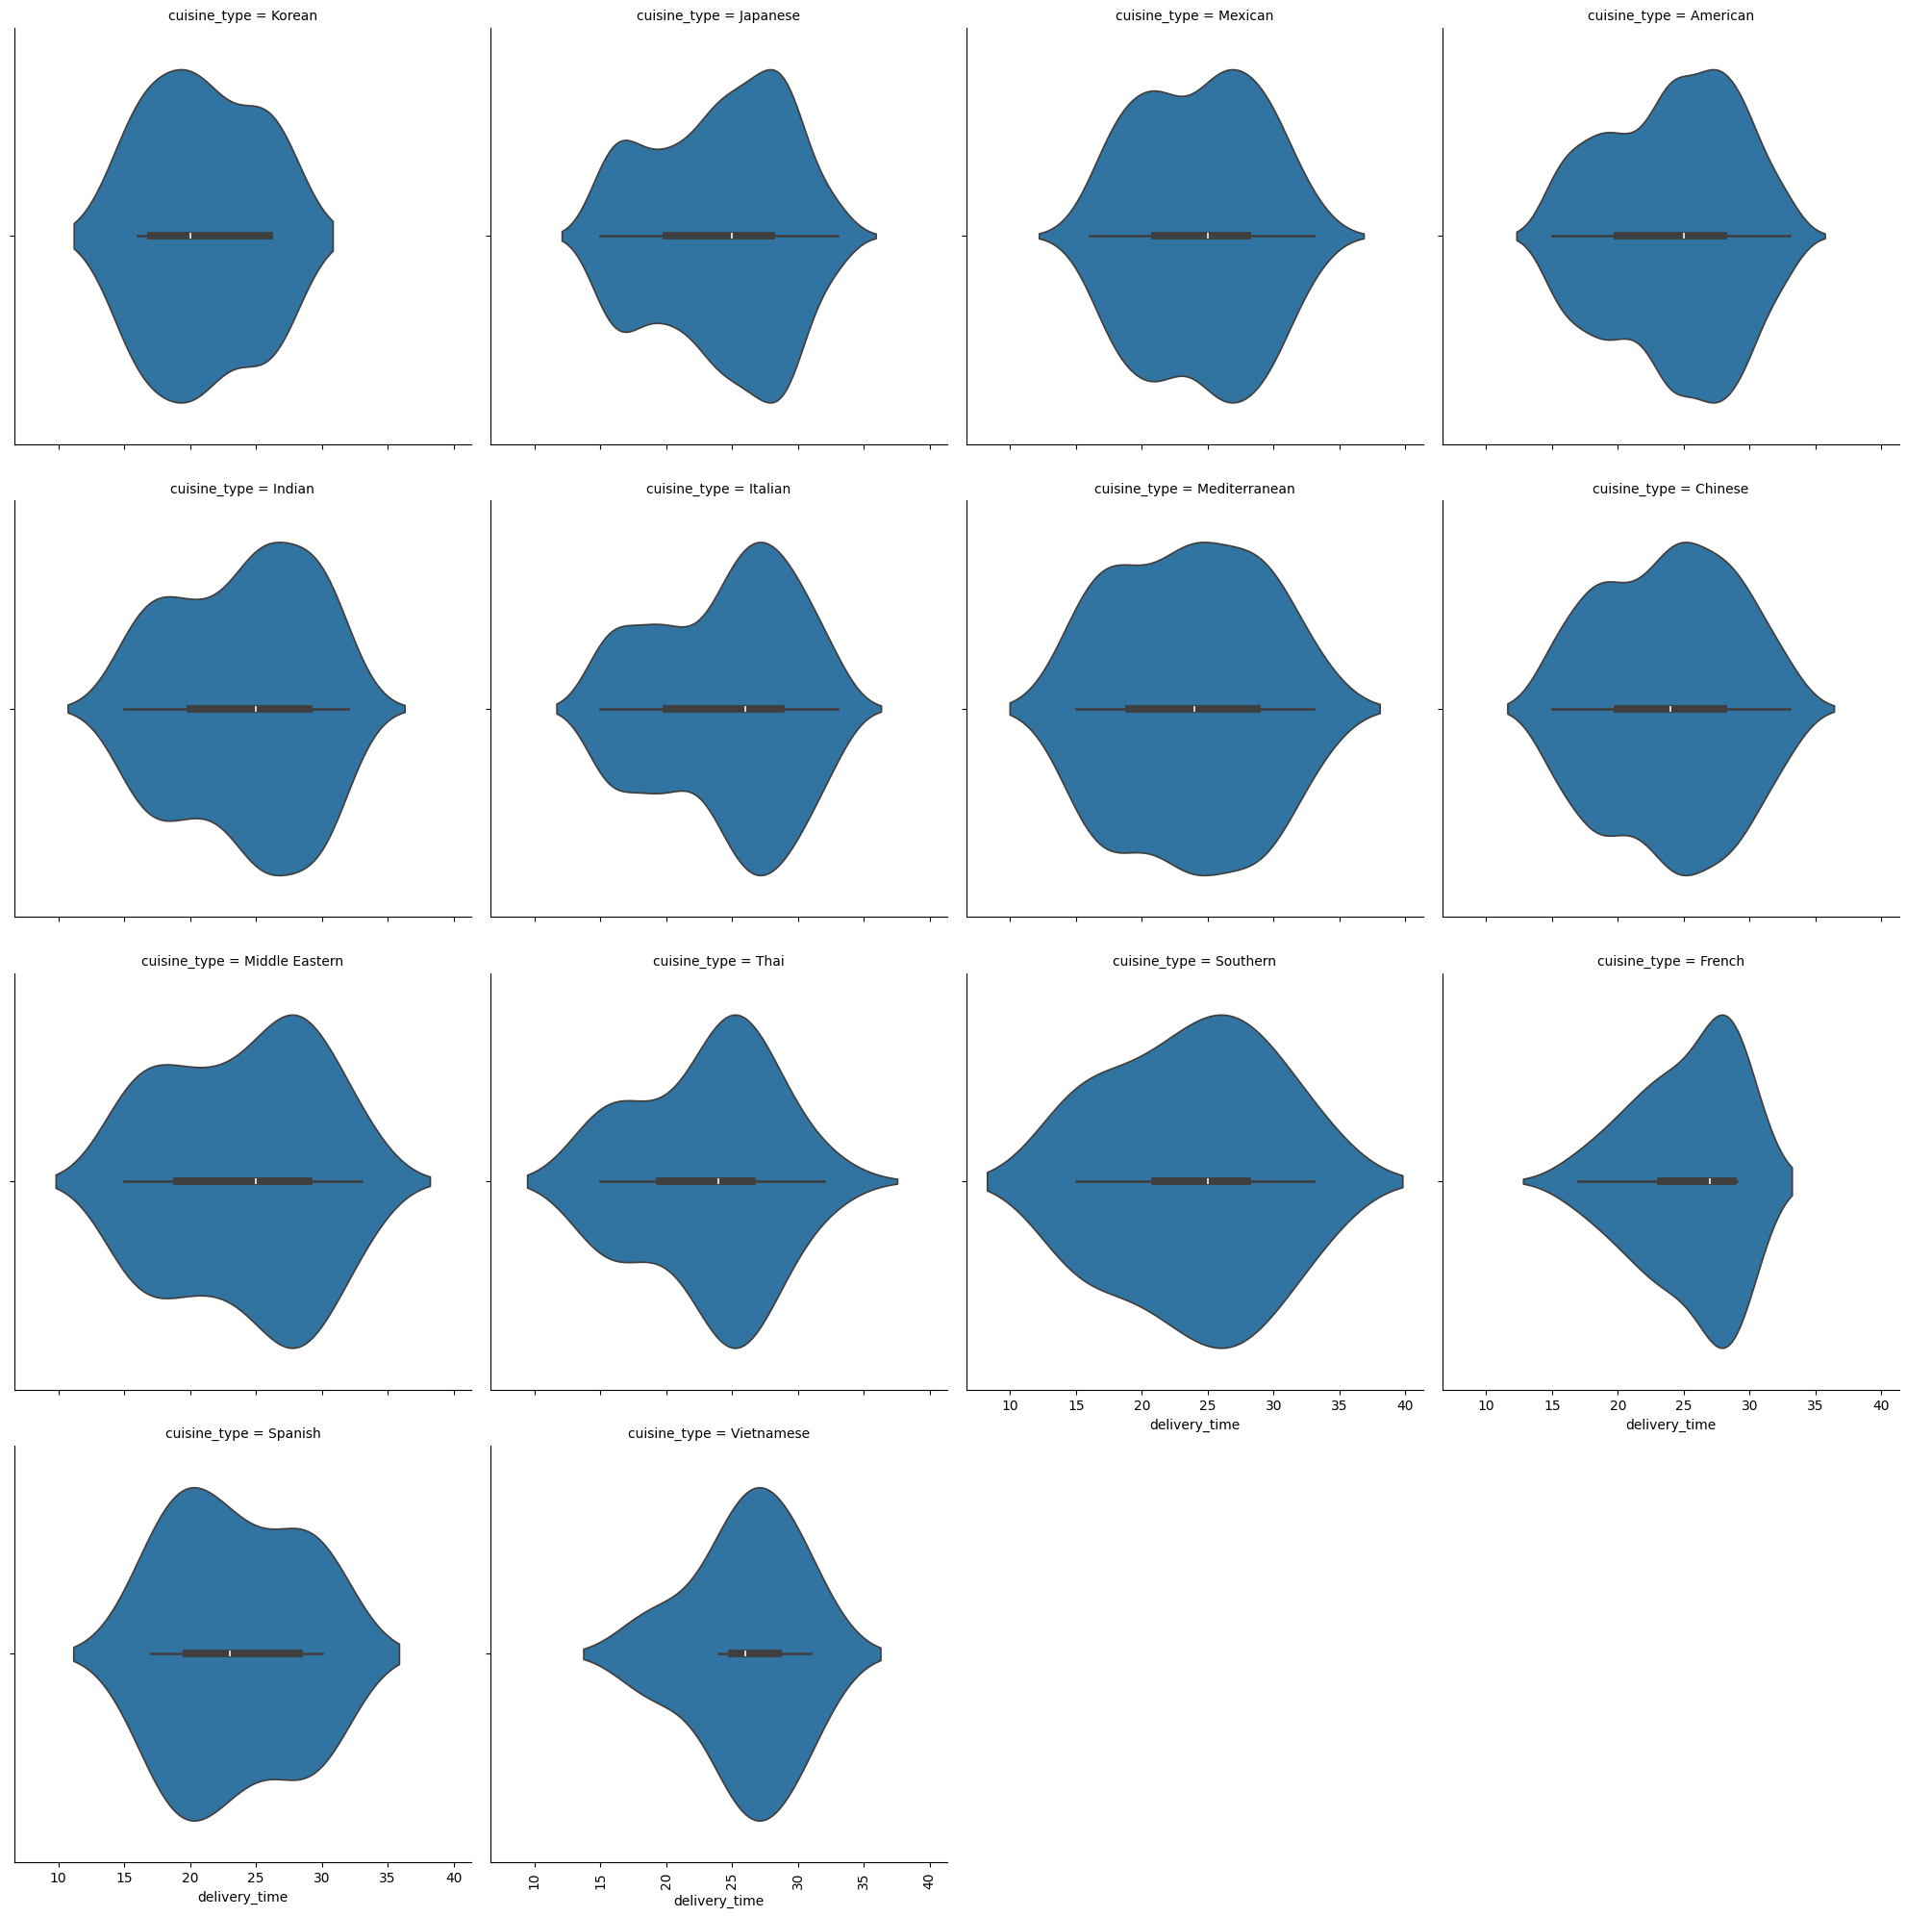

In [31]:
sns.catplot(data=df, x='cuisine_type', y='delivery_time',kind='bar')
plt.xticks(rotation=90)
plt.ylim(17,30)
plt.show()

sns.catplot(data=df, x='cuisine_type', y='delivery_time',kind='box')
plt.xticks(rotation=90)
plt.show()

sns.catplot(data=df, x='delivery_time',col='cuisine_type',col_wrap=4,kind='violin')
plt.xticks(rotation=90)
plt.show();


- Korean food has the shortest mean and median delivery time.
- Vietnamese food has the longest mean delivery time.
- The delivery time for all types of cuisines varies mostly from 17 minutes to 29 minutes.
- The delivery time for most cuisine types follows a bimodal distribution. Exceptions exist in French and Vietnamese food, which are more like normal distributions but skewed towards left.

Cost of the order and rating

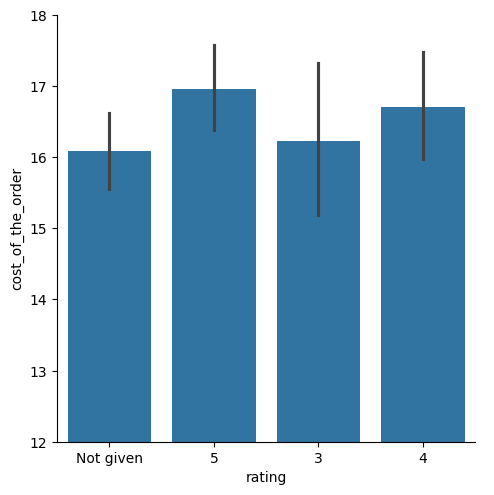

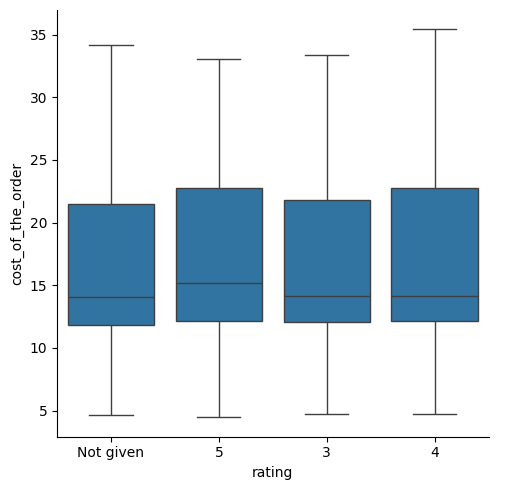

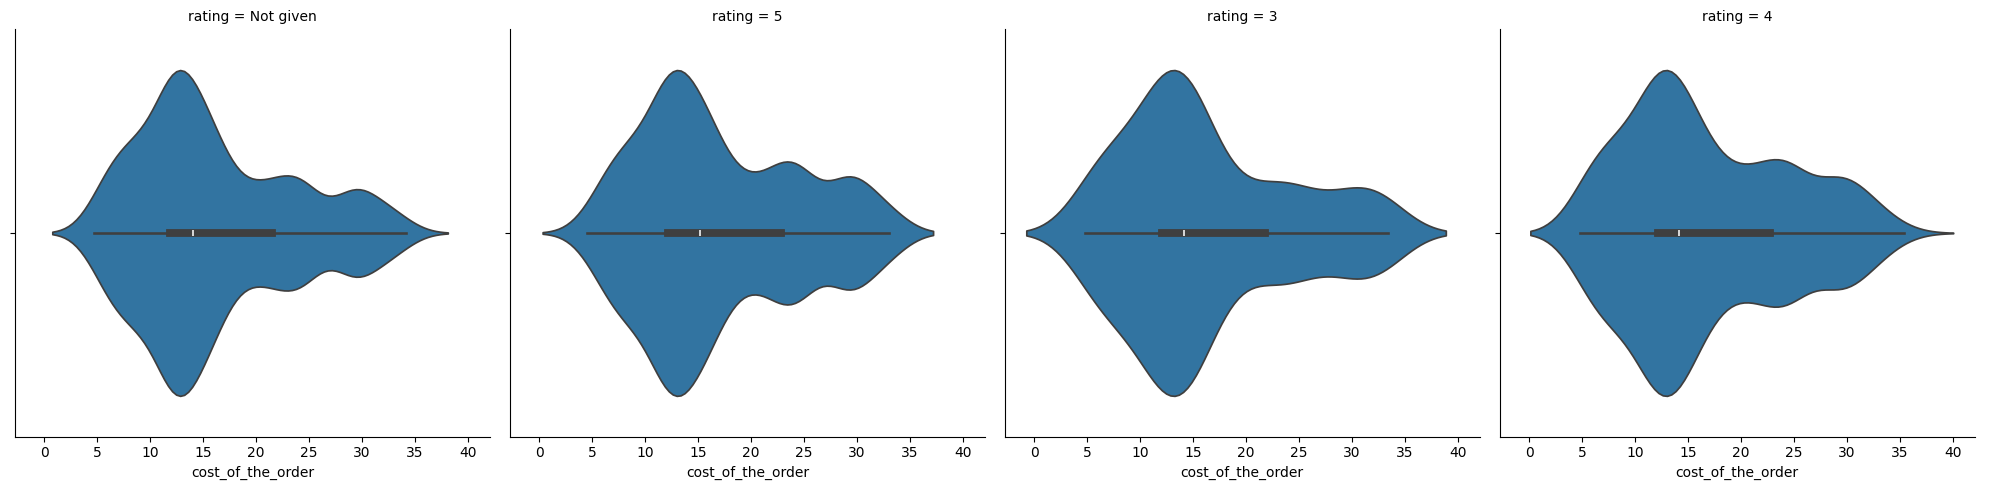

In [32]:
sns.catplot(data=df, x='rating', y='cost_of_the_order',kind='bar')
plt.ylim(12,18)
plt.show()

sns.catplot(data=df, x='rating', y='cost_of_the_order',kind='box')
plt.show()

sns.catplot(data=df, x='cost_of_the_order',col='rating',col_wrap=4,kind='violin')
plt.show();


- For the orders that were rated, the orders rated as 5 cost the most in terms of the mean and median price. The mean cost of orders rated with 3 was the cheapest for all rated orders.
- The cost of the order does not largely vary with the order rating in the box plot.
- The orders that are not rated have slightly cheaper costs than the orders that are rated in terms of the mean cost, median cost, lower and higher quartile of the cost.
- The distributions of the order cost are right skewed in all rating categories.

Food preparation time and rating

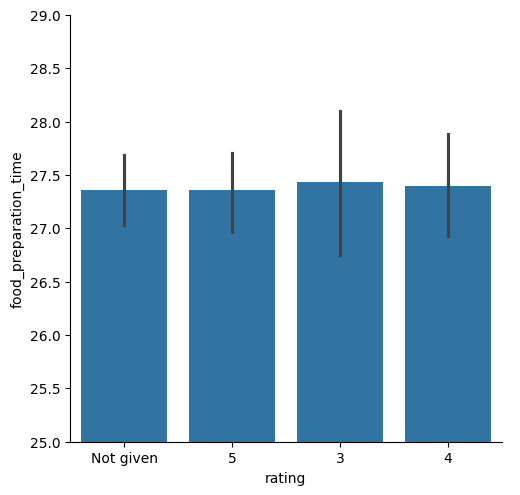

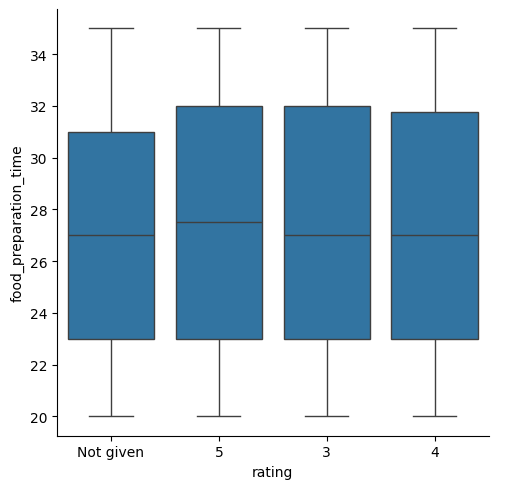

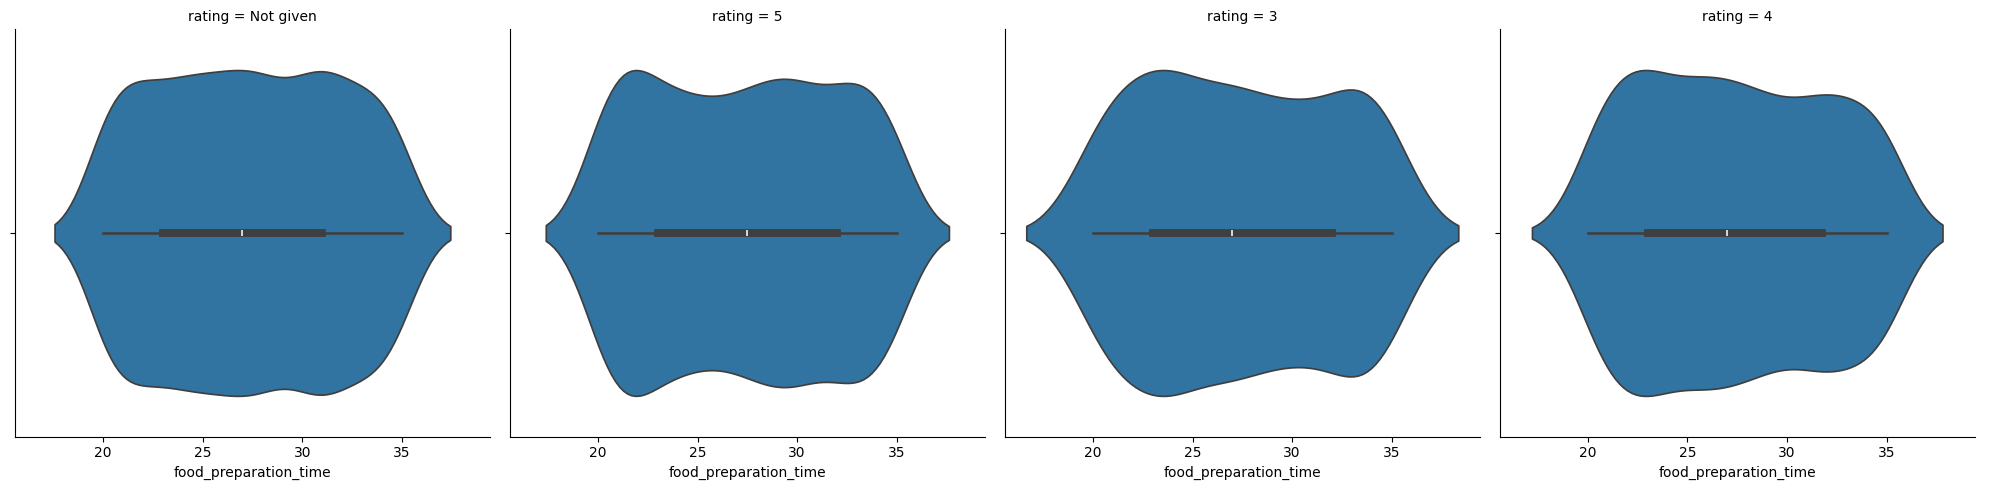

In [33]:
sns.catplot(data=df, x='rating', y='food_preparation_time',kind='bar')
plt.ylim(25,29)
plt.show()

sns.catplot(data=df, x='rating', y='food_preparation_time',kind='box')
plt.show()

sns.catplot(data=df, x='food_preparation_time',col='rating',col_wrap=4,kind='violin')
plt.show();


- The mean food preparation time shows little differences for different rating categories.
- The median food preparation time is slightly longer for orders rated as 5 than other orders.
- The distributions of food preparation time are not skewed.

Delivery time and rating

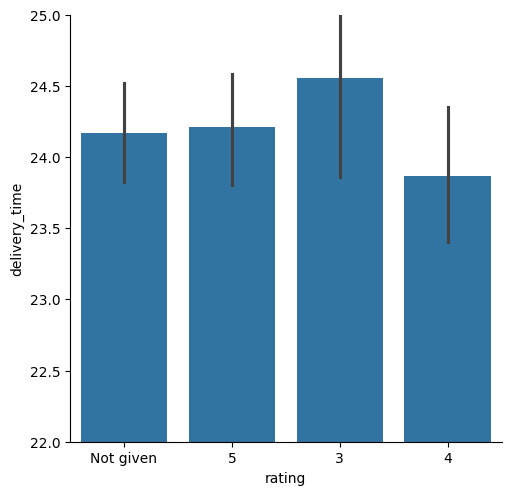

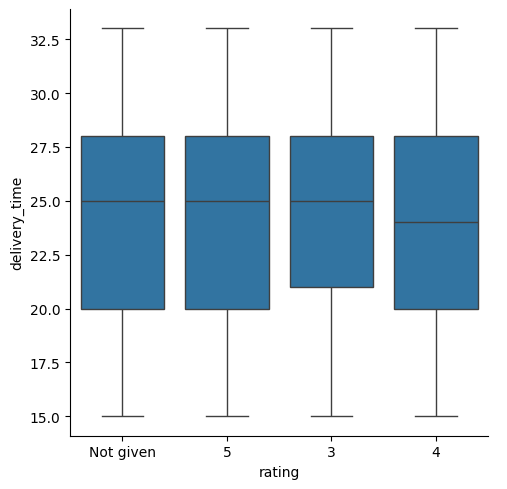

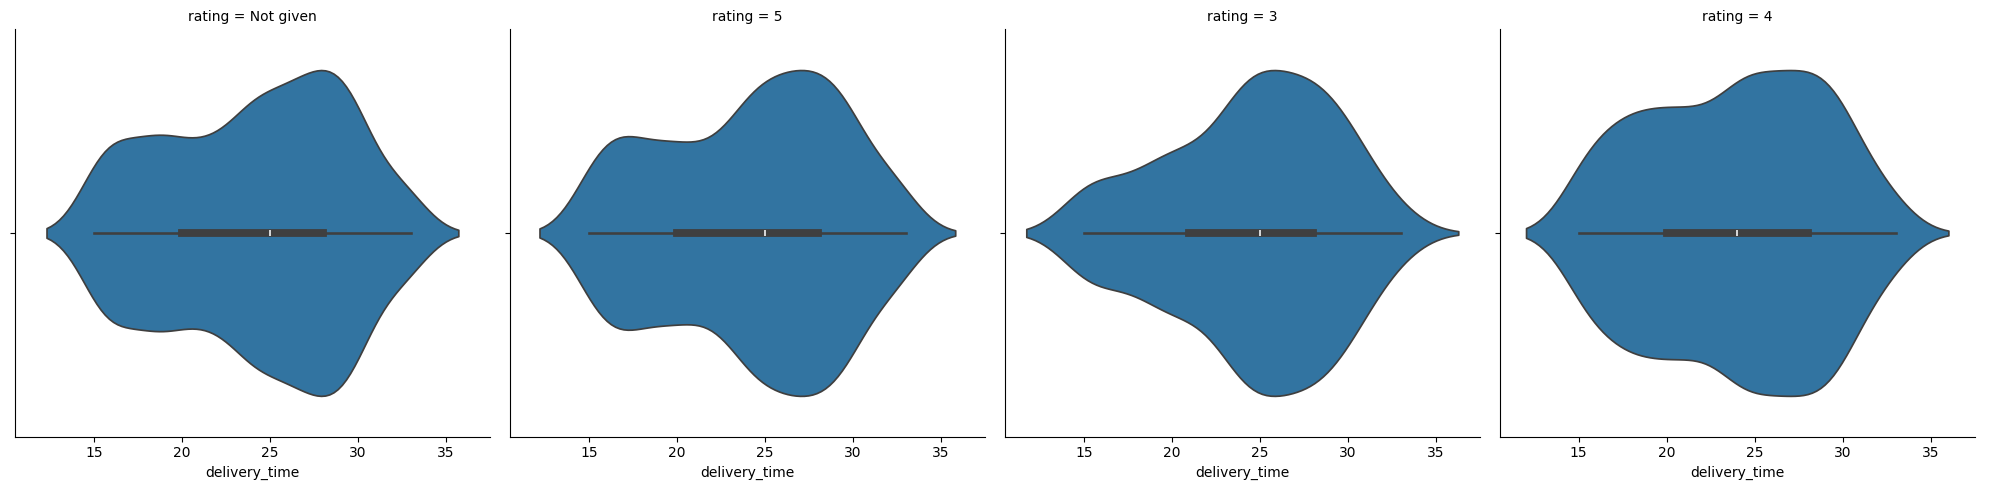

In [34]:
sns.catplot(data=df, x='rating', y='delivery_time',kind='bar')
plt.ylim(22,25)
plt.show()

sns.catplot(data=df, x='rating', y='delivery_time',kind='box')
plt.show()

sns.catplot(data=df, x='delivery_time',col='rating',col_wrap=4,kind='violin')
plt.show();

- The mean delivery time for orders rated as 3 is slightly longer than orders rated as 4 and 5.
- The lower quartile of delivery time for orders rated as 3 is also longer than orders rated as 4 and 5.
- The delivery time can affect the order rating customers provided.
- The distributions of food delivery time are skewed towards left for all orders in different rating categories.


Cost of orders and day of the week

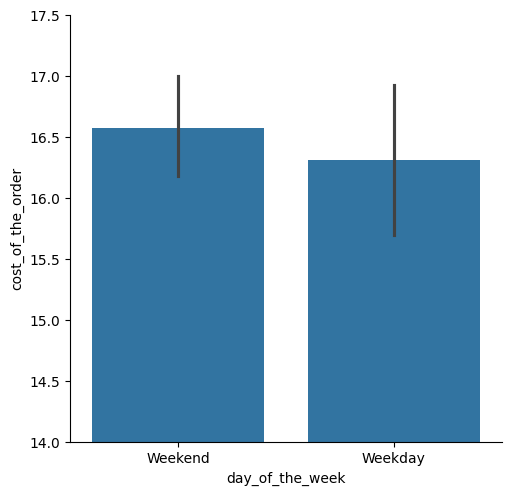

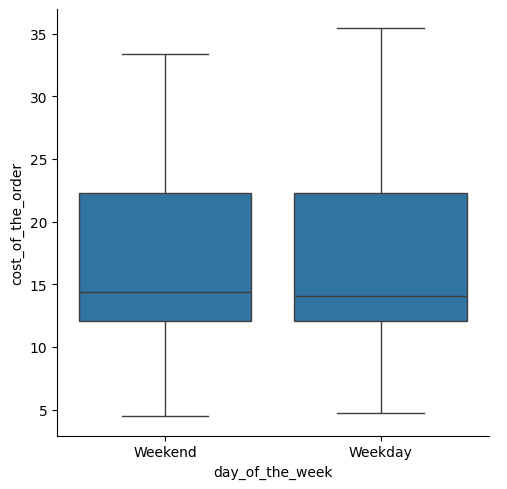

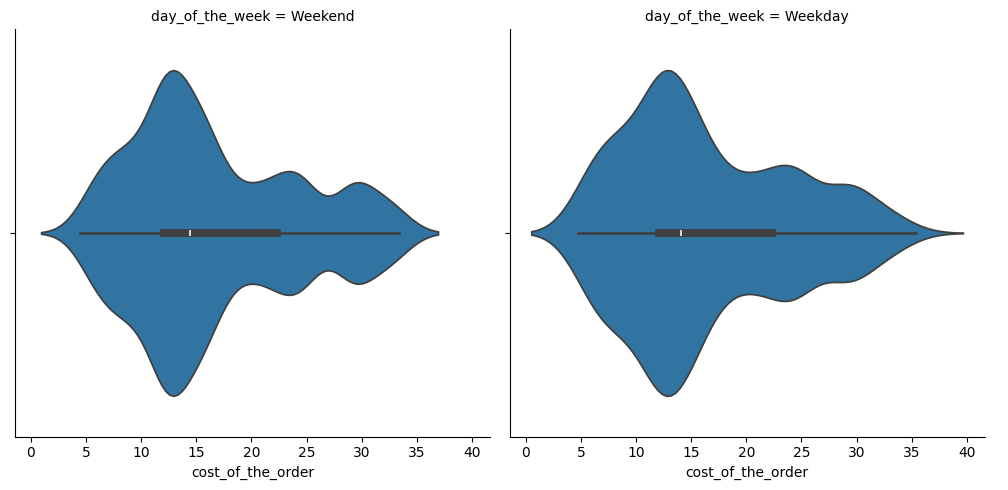

In [35]:
sns.catplot(data=df, x='day_of_the_week', y='cost_of_the_order',kind='bar')
plt.ylim(14,17.5)
plt.show()

sns.catplot(data=df, x='day_of_the_week', y='cost_of_the_order',kind='box')
plt.show()

sns.catplot(data=df, x='cost_of_the_order',col='day_of_the_week',col_wrap=2,kind='violin')
plt.show();

- The mean and median cost of order is slightly higher in the weekends than weekdays.
- The inner quartile range of the order cost are comparable between the weekends and weekdays.
- The distributions of the order costs are skewed towards right in both the weekdays and weekends.

Food preparation time and day of the week

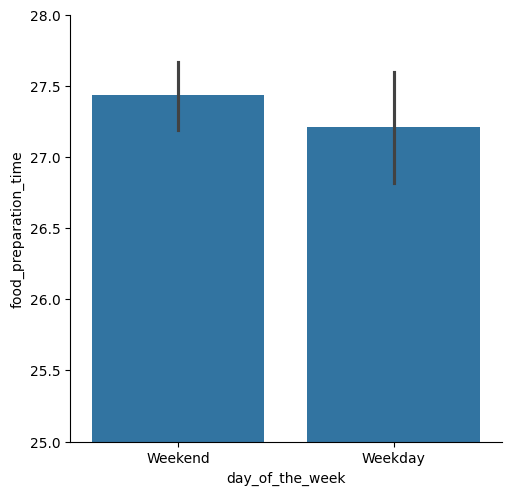

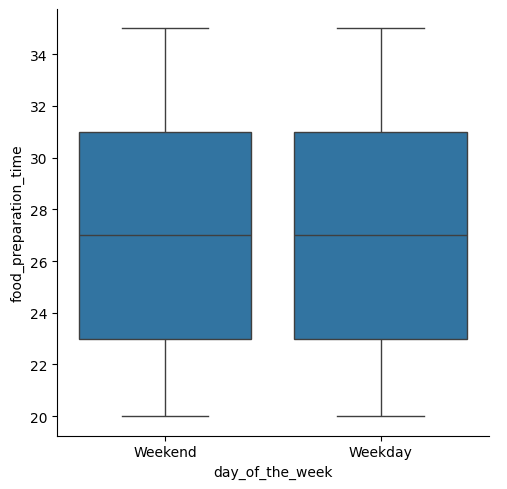

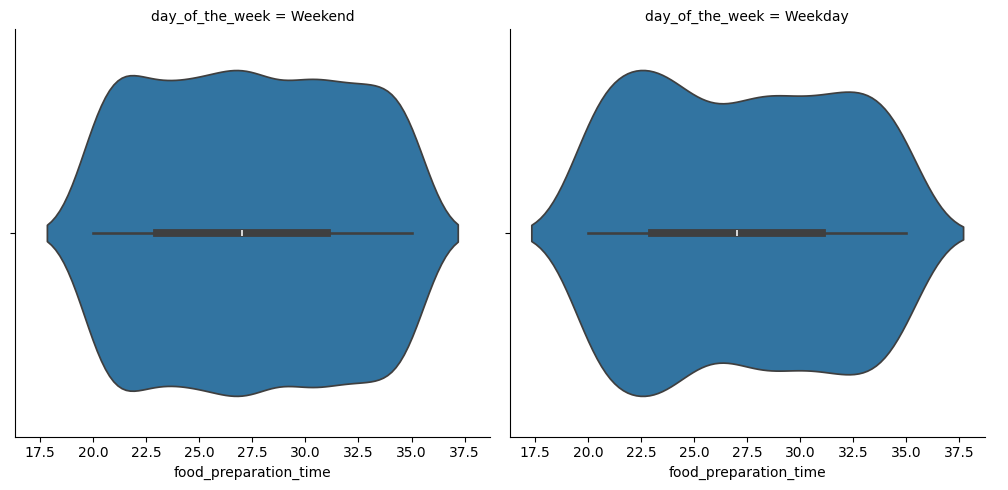

In [36]:
sns.catplot(data=df, x='day_of_the_week', y='food_preparation_time',kind='bar')
plt.ylim(25,28)
plt.show()

sns.catplot(data=df, x='day_of_the_week', y='food_preparation_time',kind='box')
plt.show()

sns.catplot(data=df, x='food_preparation_time',col='day_of_the_week',col_wrap=2,kind='violin')
plt.show();

- The mean food preparation time for orders made in the weekends is slightly longer than in the weekdays.
- The inner quartile and median food preparation time are comparable for orders made in the weekends and weekdays.
- The food preparation time distribution in the weekends is more like a normal distribution, while the food preparation time distribution in the weekdays is skewed towards right.

Delivery time and day of the week

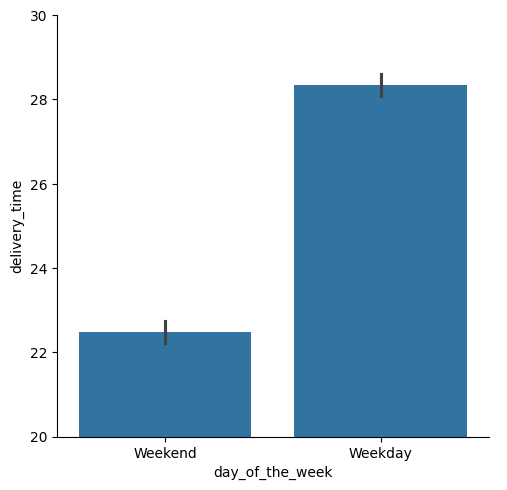

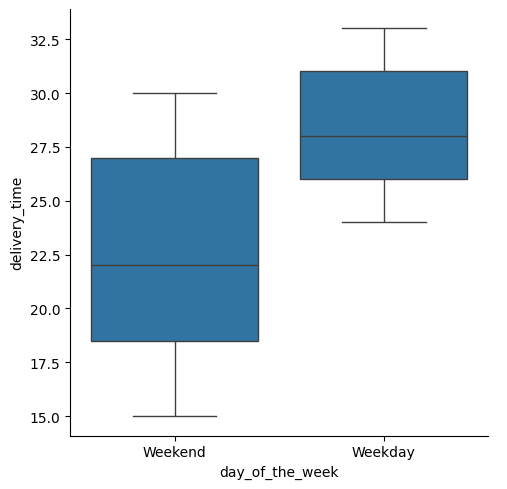

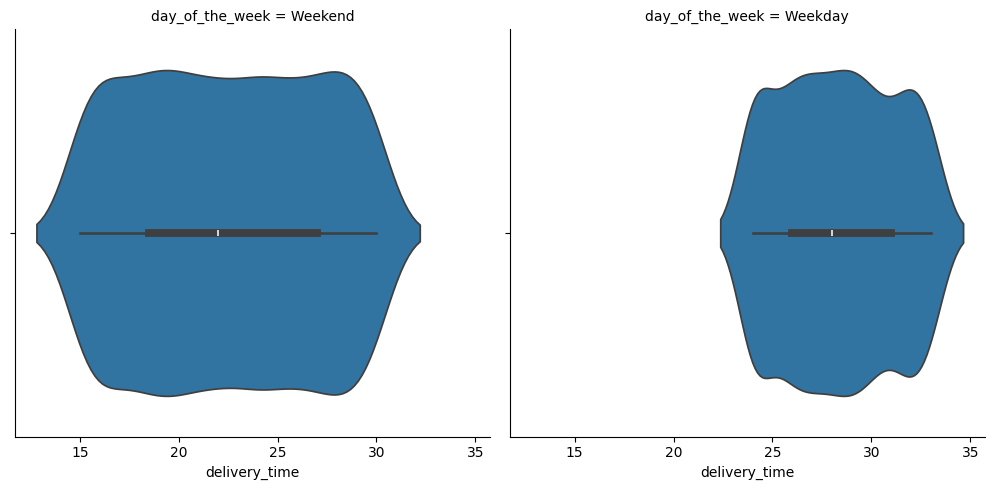

In [37]:
sns.catplot(data=df, x='day_of_the_week', y='delivery_time',kind='bar')
plt.ylim(20,30)
plt.show()

sns.catplot(data=df, x='day_of_the_week', y='delivery_time',kind='box')
plt.show()

sns.catplot(data=df, x='delivery_time',col='day_of_the_week',col_wrap=2,kind='violin')
plt.show();

- The mean food delivery time for orders made in the weekdays is largely longer than in the weekends.
- The inner quartile and median food delivery time are both longer for orders made in the weekdays than in the weekends.
- The distributions of food delivery time are more like normal distributions in both weekdays and weekends.

Cost of orders, cuisine type, and day of the week

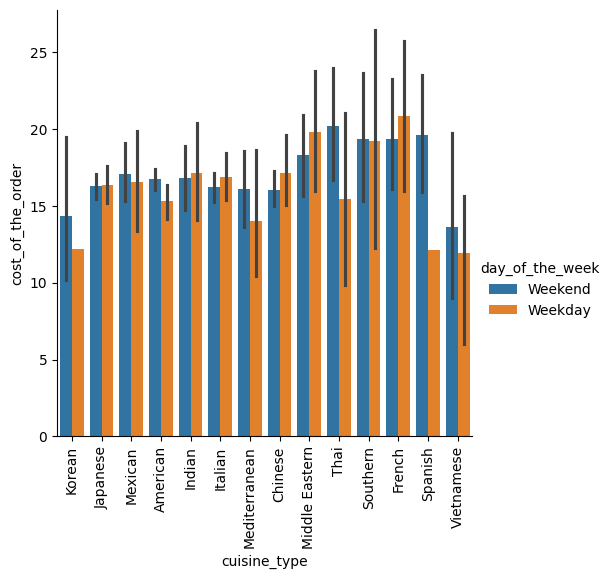

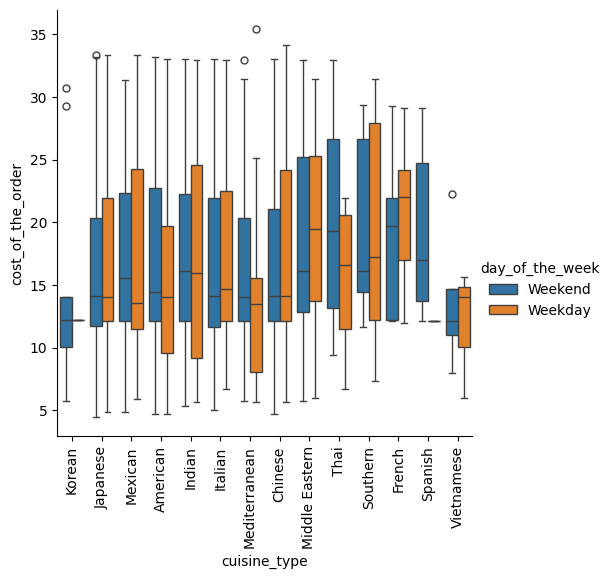

In [38]:
sns.catplot(data=df, x='cuisine_type', y='cost_of_the_order',hue='day_of_the_week',kind='bar')
plt.xticks(rotation=90)
plt.show()

sns.catplot(data=df, x='cuisine_type', y='cost_of_the_order',hue='day_of_the_week',kind='box')
plt.xticks(rotation=90)
plt.show();

- The mean cost of the order is higher in the weekend for Korean, Mexican, American, Mediterranean, Thai, Southern, Spanish and Vietnamese food.
- The cost of order difference between weekend and weekdays varies largely for different cuisine types.
- The higher quartile of the order cost is higher in the weekday than weekend for most cuisine types except Korean, American, Mediterranean, Thai, and Spanish food.

Food preparation time, cuisine type, and day of the week

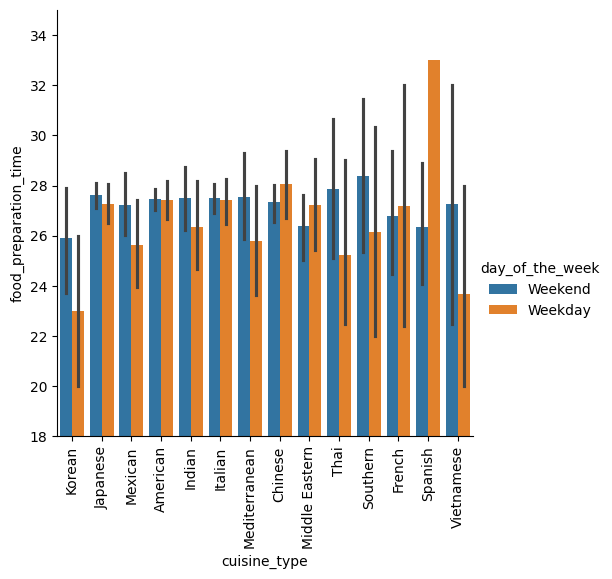

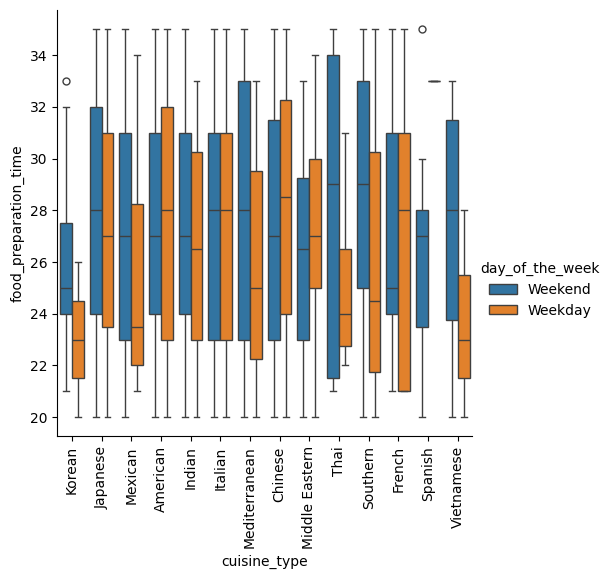

In [39]:
sns.catplot(data=df, x='cuisine_type', y='food_preparation_time',hue='day_of_the_week',kind='bar')
plt.xticks(rotation=90)
plt.ylim(18,35)
plt.show()

sns.catplot(data=df, x='cuisine_type', y='food_preparation_time',hue='day_of_the_week',kind='box')
plt.xticks(rotation=90)
plt.show();

- The mean food preparation time is longer in the weekend than weekday for all cuisine types except Chinese, Middle Eastern, French, and Spanish food.
- The median food preparation time is longer in the weekend than weekday in Korean, Japanese, Mexican, Indian, Miediterranean, Thai, Southern, and Vietnamese food.
- The food preparation time difference between weekdays and weekends varies among different cuisine types.

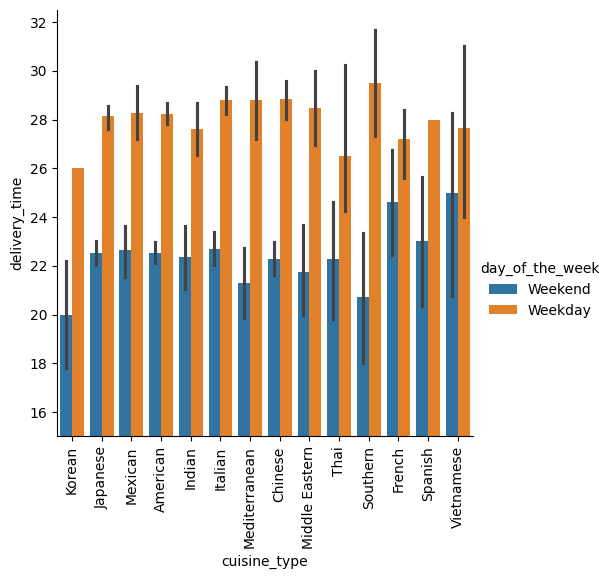

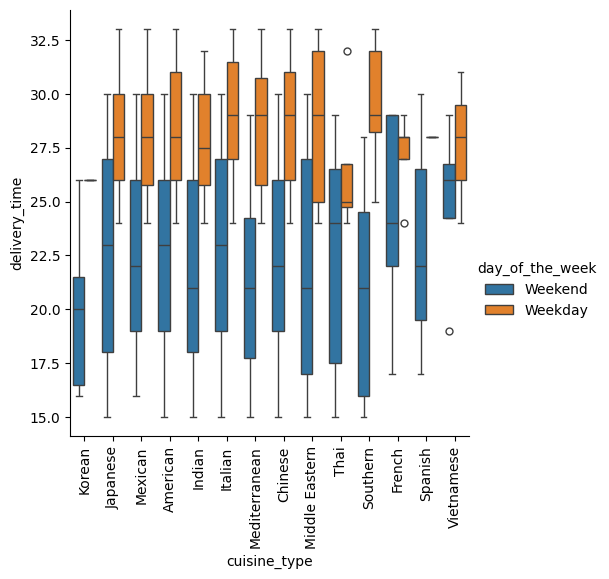

In [40]:
sns.catplot(data=df, x='cuisine_type', y='delivery_time',hue='day_of_the_week',kind='bar')
plt.xticks(rotation=90)
plt.ylim(15,32.5)
plt.show()

sns.catplot(data=df, x='cuisine_type', y='delivery_time',hue='day_of_the_week',kind='box')
plt.xticks(rotation=90)
plt.show();

- The mean and median delivery time and the inner quartile range of food delivery time are longer in the weekdays than in the weekend for all cuisine types.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [41]:
# Write the code here
# Get the order data that are rated.
df_new = df[df['rating']!='Not given'].copy()

# Convert the data type to integer.
df_new['rating'] = df_new['rating'].astype('int')

In [42]:
# Calculate the rating count for all restaurants.
df_rating_num = df_new.groupby(df_new['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()

# Filter the restaurants that have a rating count of more than 50.
df_rating_restname = df_rating_num['restaurant_name'][df_rating_num['rating'] > 50]
df_rating_restname

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

In [43]:
# Get all the ratings for restaurants that have more than 50 rating counts.
df_new_rating = df_new[df_new['restaurant_name'].isin(df_rating_restname)].copy()
df_new_rating

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26
22,1478287,150599,Shake Shack,American,29.10,Weekday,5,21,30
...,...,...,...,...,...,...,...,...,...
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1886,1478277,48282,The Meatball Shop,American,14.50,Weekend,5,34,25


In [44]:
# Calculate the average rating for all restaurants that have rating counts more than 50.
df_new_rating.groupby(df_new_rating['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:

The restaurant fulfilling the criteria to get the promotional offer are The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, Blue Ribbon Sushi.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [45]:
# Write the code here
# Define a function to calculate the company charges
def company_charges(x):
    '''
    Calculate the company charges. The company charges the restaurant 25% on the orders having
    cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars.
    '''
    charge = 0.

    if x > 20.:
      charge = x * 0.25
    elif x > 5.:
      charge = x * 0.15

    return charge


In [46]:
revenue = df['cost_of_the_order'].copy()

In [47]:
total_revenue = revenue.apply(company_charges).sum()
print('The net revenue across all orders is '+str(round(total_revenue))+' dollars.')

The net revenue across all orders is 6166 dollars.


#### Observations:

The net revenue generated by the company across all the orders is 6166 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [48]:
# Write the code here
# Calculate the sum of food preparation time and food delivery time.
total_time = df['food_preparation_time'] + df['delivery_time']

# Count the orders that total time is longer than 60 minutes and divide the count by total number of orders.
percent = total_time[total_time > 60.].count()/df['order_id'].count() * 100.
print(str(round(percent))+'% of orders take more than 60 minutes to get delivered from the time the order is placed.')

11% of orders take more than 60 minutes to get delivered from the time the order is placed.


#### Observations:

11% of orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [49]:
# Write the code here
# Calculate the mean delivery time for orders grouped by the day of the week.
mean_delivery_time = df.groupby(df['day_of_the_week'])['delivery_time'].mean()
mean_delivery_time

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

In [50]:
print('The mean delivery time during weekdays is '+str(round(mean_delivery_time[0]))+' minutes, and the mean delivery time during weekends is '+str(round(mean_delivery_time[1]))+' minutes.')

The mean delivery time during weekdays is 28 minutes, and the mean delivery time during weekends is 22 minutes.


#### Observations:

The mean delivery time during weekdays is 28 minutes and the mean delivery time during weekends is 22 minutes. The mean delivery time during weekdays is longer than during the weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The net revenue generated by the company across all the orders is 6166 dollars.
*  There are 1898 unique orders in the dataset. The orders are made by 1200 unique customers. Among all the orders, 178 unique restaurants are involved, which covers 14 different cuisine types.
*  Among all the cuisine types, American food has the most orders, followed by the Japanese food, Italian food, and Chinese food in terms of the order counts. American food is also the most popular food during the weekends.
*  The cost of the orders occurs the most aounr 13 dollars. The median order cost is around 14 dollars and 29% of the orders cost more than 20 dollars. The distribution of order costs is right-skewed. Among all the cuisine types, Korean and Vietnamese food usually cost less and French food usually costs the most compared to other cuisines.
*  There are more order numbers in the weekends than in the weekdays. The mean and median order costs are slightly higher in the weekends than the weekdays. The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.
*  In all the orders, 736 orders are not rated, which consists of 38.8% of the orders. For all the orders that are rated, the orders that rated 5 cost the most in terms of the mean and median price. The orders that rated 3 have the cheapest mean price. We also find that the food delivery time can largely affect the order rating. For example, the mean and the lower quartile of the food delivery time for orders rated 3 are longer than orders rated. as 4 and 5.
*  Food preparation time ranges from 20 minutes to 35 minutes in the dataset. The median food preparation time greatly varies for different cuisine types. The median food preparation time is also found slightly longer for orders rated as 5 than other ratings. The mean food preparation time for orders made in the weekends is slightly longer than in the weekdays.
*  The mean food delivery time for all orders is 24 minutes. The distribution of food delivery time is skewed towards left. The food delivery time during weekdays is longer than weekends. For example, the mean food delivery time in weekdays is 28 minutes, whereas it is 22 minutes in the weekends. The longer delivery time in the weekdays is the case for all cuisine types. Moreover, 11% of orders take more than 60 minutes to be delivered from the time the order is placed.
*  The most frequent customer placed 13 orders.
*  4 restaurants have rating counts of more than 50 and the average rating greater than 4, which are The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, Blue Ribbon Sushi.

### Recommendations:

*  Base on the popularity of cuisine types, the company can build up more collaborations with American cuisine restaurants.
*  As the order number is larger and the order cost is generally higher in the weekends than in the weekdays, the company may provide more promotions to attract more customers and more orders in the weekends to further increase its revenue.
*  As the cost of orders varies for different cuisine types, the company may consider collecting a varying margin of the delivery order from the different restaurants to improve its revenue.
*  The order rating is largely affected by the food delivery time, and the delivery time is greatly impacted by the day of the week. The traffic in weekdays probably explains the slower delivery service. To improve the customer satification, the company may introduce strategies to better avoid the impact of traffic on the delivery service. For example, suggesting the delivery people to use e-bicycles instead of car in their delivery can probably help avoid the traffic in weekdays. Meanwhile, the company may also improve their app for delivery people to let them more easliy use the map and GPS function in the app to reduce the time that wasted when finding the delivery information.
*  As the orders rated as 5 usually cost more and their order preparation time is also longer. The fancier cuisine and the better quality of the food may more easily make customers to feel satisfied with their orders. The company should be cautious when using order preparation time to judge the restaurant business. The longer order preparation time may not demonstrate the low opeartion efficiency of the restaurant, but may instead suggest they need longer time to make sure the good quality of their food.

In [51]:
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/Project 1/PYF_Project_LearnerNotebook_FullCode.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Project 1/PYF_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 3285567 bytes to /content/drive/MyDrive/Colab Notebooks/Project 1/PYF_Project_LearnerNotebook_FullCode.html


---